In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

alldf = pd.read_csv("cypsDB-new.csv")
alldf.shape
alldf.columns

Index(['protein', 'name', 'reaction', 'rheaID', 'substrates',
       'Substrate CHEBI ID', 'Substrate SMILES', 'reducing_agent', 'cofactor',
       'products', 'Product CHEBI ID', 'Product SMILES', 'organism_name',
       'kingdom_name', 'superkingdom_name', 'sequence', 'length',
       'additional info'],
      dtype='object')

In [2]:
df = alldf.drop_duplicates(subset=['protein'])
df.shape

(1726, 18)

In [3]:
df_wo_missvalue = df[df['kingdom_name'] != 'Archea']
df_wo_missvalue.shape

(1724, 18)

<Axes: xlabel='length', ylabel='Count'>

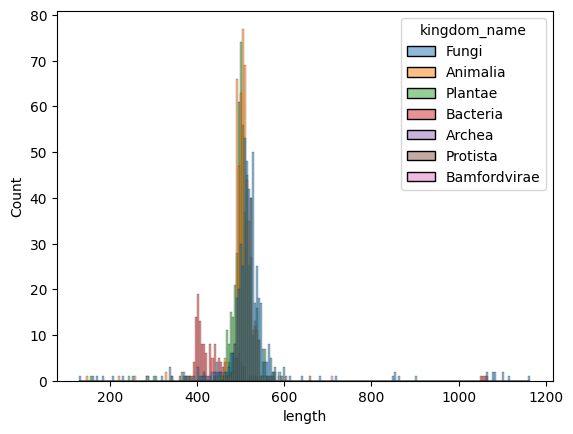

In [4]:
sns.histplot(data=df, x="length", hue="kingdom_name")

In [5]:
kingdom_counts = df.groupby('kingdom_name').size().reset_index(name='count')
kingdom_counts

,kingdom_name,count
0,Animalia,521
1,Archea,2
2,Bacteria,132
3,Bamfordvirae,2
4,Fungi,525
5,Plantae,501
6,Protista,43


In [6]:
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Animalia', 'kingdom_name'] = 'Animalia n = 521'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Bacteria', 'kingdom_name'] = 'Bacteria n = 132'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Bamfordvirae', 'kingdom_name'] = 'Bamfordvirae n = 2'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Fungi', 'kingdom_name'] = 'Fungi n = 525'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Plantae', 'kingdom_name'] = 'Plantae n = 501'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Archea', 'kingdom_name'] = 'Archea n = 2'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Protista', 'kingdom_name'] = 'Protista n = 43'


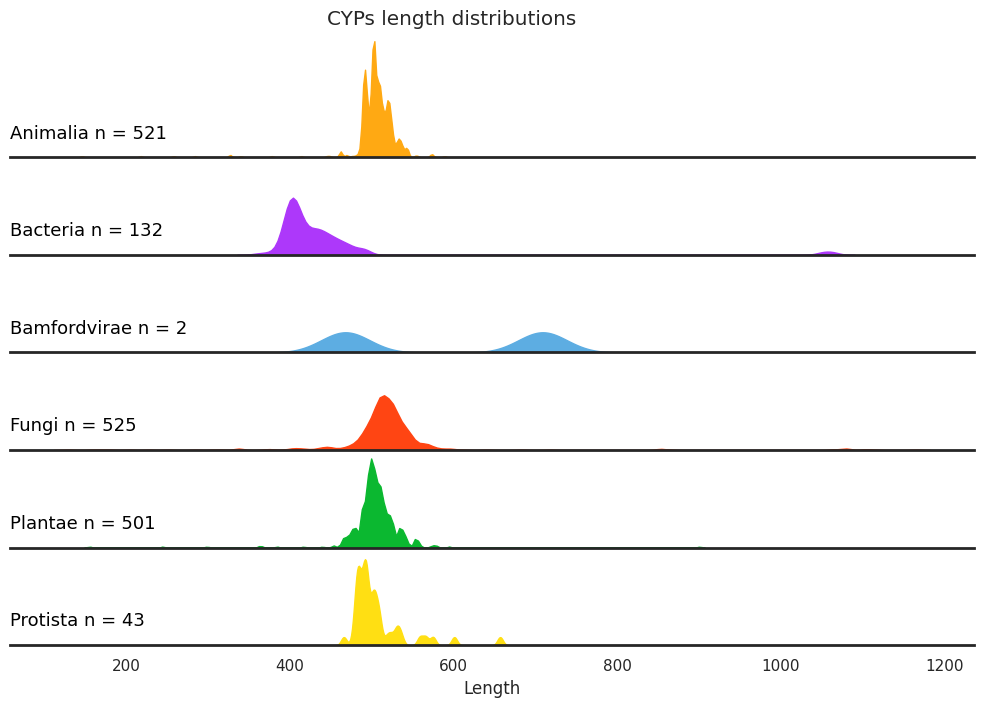

In [7]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
# palette = sns.color_palette("pastel", 12)
colors_dict = {'Animalia n = 521': '#FFA913', 'Fungi n = 525': '#FF4513', 'Plantae n = 501': '#0BB830', 'Bacteria n = 132': '#AD38FA', 'Protista n = 43': '#FFDF13','Bamfordvirae n = 2': '#5DADE2'}
order = sorted(df_wo_missvalue["kingdom_name"].unique())
g = sns.FacetGrid(df_wo_missvalue, palette=colors_dict, row="kingdom_name", hue="kingdom_name", aspect=9, height=1.2, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)
#g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None)
g.despine( left=True)
plt.suptitle('CYPs length distributions', y=0.98)
plt.savefig("./img/CYPsLnDs(whole)_bw02.pdf", format="pdf", bbox_inches="tight")

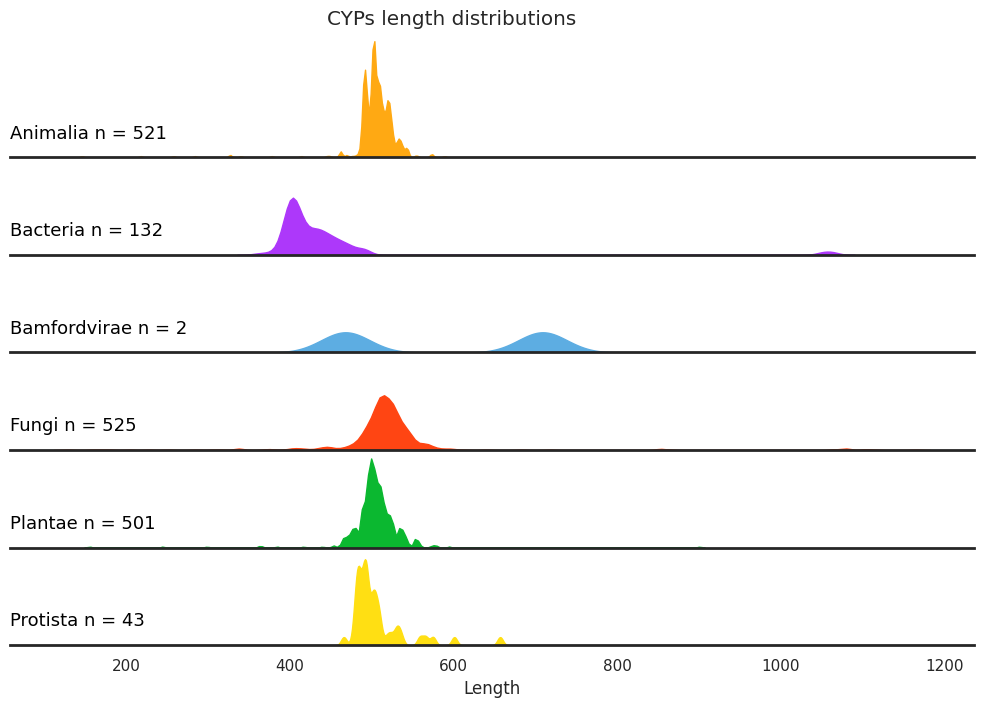

In [8]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
# palette = sns.color_palette("pastel", 12)
colors_dict = {'Animalia n = 521': '#FFA913', 'Fungi n = 525': '#FF4513', 'Plantae n = 501': '#0BB830', 'Bacteria n = 132': '#AD38FA', 'Protista n = 43': '#FFDF13','Bamfordvirae n = 2': '#5DADE2'}
order = sorted(df_wo_missvalue["kingdom_name"].unique())
g = sns.FacetGrid(df_wo_missvalue, palette=colors_dict, row="kingdom_name", hue="kingdom_name", aspect=9, height=1.2, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)
#g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None)
g.despine( left=True)
plt.suptitle('CYPs length distributions', y=0.98)
plt.savefig("./img/CYPsLnDs(whole)_bw02.pdf", format="pdf", bbox_inches="tight")

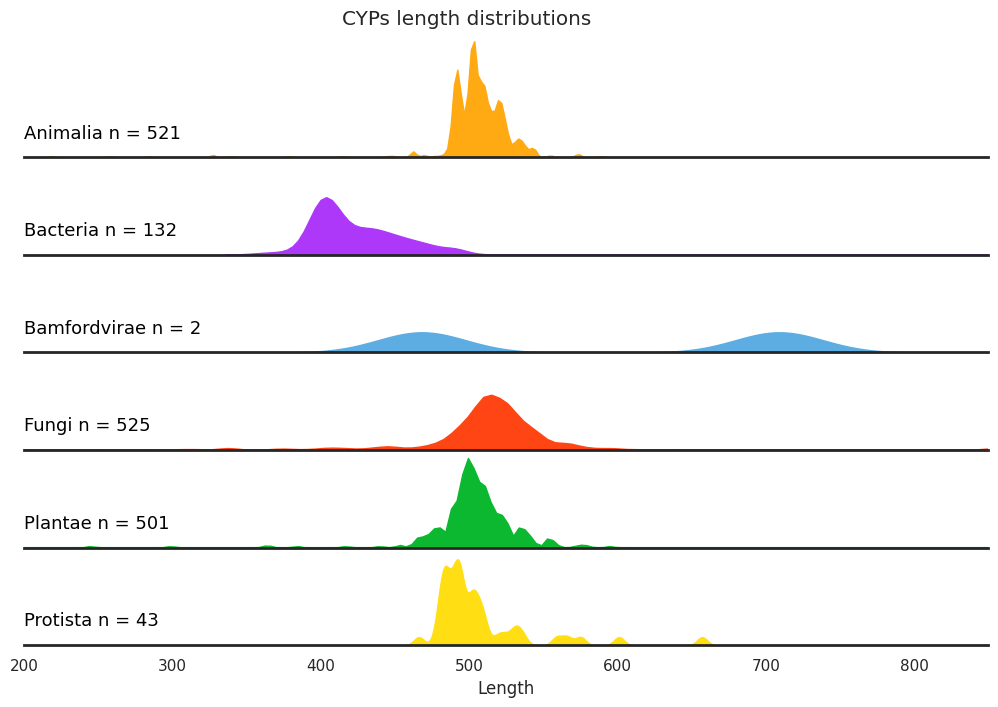

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
# palette = sns.color_palette("pastel", 12)
colors_dict = {'Animalia n = 521': '#FFA913', 'Fungi n = 525': '#FF4513', 'Plantae n = 501': '#0BB830', 'Bacteria n = 132': '#AD38FA', 'Protista n = 43': '#FFDF13','Bamfordvirae n = 2': '#5DADE2'}
order = sorted(df_wo_missvalue["kingdom_name"].unique())
g = sns.FacetGrid(df_wo_missvalue, palette=colors_dict, row="kingdom_name", hue="kingdom_name", aspect=9, height=1.2, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)
#g.map_dataframe(sns.kdeplot, x="length", color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None, xlim=(200,850))
g.despine( left=True)
plt.suptitle('CYPs length distributions', y=0.98)
plt.savefig("./img/CYPsLnDs_bw02.pdf", format="pdf", bbox_inches="tight")

In [10]:
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Animalia n = 521', 'kingdom_name'] = 'Animalia'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Bacteria n = 132', 'kingdom_name'] = 'Bacteria'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Bamfordvirae n = 2', 'kingdom_name'] = 'Bamfordvirae'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Fungi n = 525', 'kingdom_name'] = 'Fungi'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Plantae n = 501', 'kingdom_name'] = 'Plantae'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Archea n = 2', 'kingdom_name'] = 'Archea'
df_wo_missvalue.loc[df_wo_missvalue['kingdom_name'] == 'Protista n = 43', 'kingdom_name'] = 'Protista'

We can see that there is a small number of CYPs about 1100 AA long. All the other ones are aproximately 500 AA long. We are going to take a look at the long ones to see if they are part of some gene cluster.

In [11]:
# filtering out the long CYPs from the database
longCYPsOnly = df.loc[df['length'] > 830]
longCYPsOnly = longCYPsOnly.loc[longCYPsOnly['length'] < 870]
longCYPs = df.loc[df['length'] > 1050]
longCYPs = df.loc[df['length'] < 1075]
longCYPs = longCYPs.drop('additional info', axis=1)
#longCYPs.shape
longCYPsPlants = df.loc[df['length'] > 890]
longCYPsPlants = longCYPsPlants.loc[longCYPsPlants['length'] < 920]
#longCYPsPlants = longCYPsOnly.loc[longCYPsOnly['kingdom_name'] == 'Plantae']
# there are only 27 CYPs longer than 1000 AA, 36 longer than 800 AA

# we can see the peaks with enzymes longer than 1000 in Fungi and Bacteria so we will see how many are there in these two together

longCYPsFungi = longCYPs.loc[longCYPs['kingdom_name'] == 'Fungi']
longCYPsOnlyFun = longCYPsOnly.loc[longCYPsOnly['kingdom_name'] == 'Fungi']
longCYPsFungi.shape 
# 19 long CYPs in Fungi

longCYPsBact = longCYPs.loc[longCYPs['kingdom_name'] == 'Bacteria']
longCYPsBact.shape 
# 8 long CYPs in Bacteria

# that's 27 together and that is the number we got overall so we'll now take a look at these in the Uniprot db to see their function


(132, 17)

In [12]:
longCYPsPlants

,protein,name,reaction,rheaID,substrates,Substrate CHEBI ID,Substrate SMILES,reducing_agent,cofactor,products,Product CHEBI ID,Product SMILES,organism_name,kingdom_name,superkingdom_name,sequence,length,additional info
574,P0DKI7,Bifunctional protein STORR,"(R)-reticuline + NADP(+) = 1,2-dehydroreticuli...",17569,(R)-reticuline,58144,COc1ccc(C[C@H]2[NH+](C)CCc3cc(OC)c(O)cc23)cc1O,NADP(+),heme b,"1,2-dehydroreticuline",18363,COc1ccc(CC2=[N+](C)CCc3cc(OC)c(O)cc23)cc1O,Papaver somniferum,Plantae,Eukaryota,MELQYISYFQPTSSVVALLLALVSILSSVVVLRKTFLNNYSSSPAS...,901,NaN


Text(0.4, 0.35, 'PF00258  PF00175')

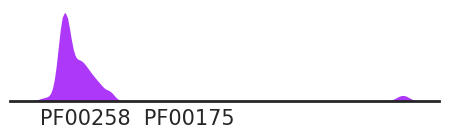

In [13]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
colors_dict = {'Animalia n = 521': '#FFA913', 'Fungi': '#FF4513', 'Plantae n = 501': '#0BB830', 'Bacteria': '#AD38FA', 'Protista n = 43': '#FFDF13','Bamfordvirae n = 2': '#5DADE2'}
order = sorted(longCYPsBact["kingdom_name"].unique())
g = sns.FacetGrid(longCYPsBact, palette=colors_dict, hue="kingdom_name", aspect=3, height=1.8, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)

g.fig.subplots_adjust(hspace=-.2)
g.set(xticks=[], yticks=[], xlabel=None,ylabel=None)
g.despine( left=True)
plt.suptitle('PF00258  PF00175', y=0.35,x=0.4,fontsize=15)
#plt.savefig("./img/CYPsLnDs(whole)_bw02.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 0.35, 'PF00258  PF00175  PF03098')

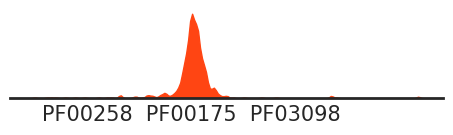

In [14]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
colors_dict = {'Animalia n = 521': '#FFA913', 'Fungi': '#FF4513', 'Plantae n = 501': '#0BB830', 'Bacteria n = 132': '#D7A0F7', 'Protista n = 43': '#FFDF13','Bamfordvirae n = 2': '#5DADE2'}
order = sorted(longCYPsFungi["kingdom_name"].unique())
g = sns.FacetGrid(longCYPsFungi, palette=colors_dict, hue="kingdom_name", aspect=3, height=1.8, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)

g.fig.subplots_adjust(hspace=-.2)
g.set(xticks=[], yticks=[], xlabel=None,ylabel=None)
g.despine( left=True)
plt.suptitle('PF00258  PF00175  PF03098', y=0.35,fontsize=15)
#plt.savefig("./img/CYPsLnDs(whole)_bw02.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 0.5, 'PF00753')

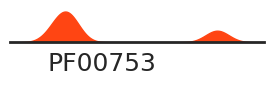

In [15]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
#colors_dict = {'Animalia n = 521': '#FFA913', 'Fungi': '#FF4513', 'Plantae n = 501': '#0BB830', 'Bacteria n = 132': '#D7A0F7', 'Protista n = 43': '#FFDF13','Bamfordvirae n = 2': '#5DADE2'}
order = sorted(longCYPsOnlyFun["kingdom_name"].unique())
g = sns.FacetGrid(longCYPsOnlyFun, palette=colors_dict, hue="kingdom_name", aspect=3, height=1.2, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)

g.fig.subplots_adjust(hspace=-.2)
g.set(xticks=[], yticks=[], xlabel=None,ylabel=None)
g.despine( left=True)
plt.suptitle('PF00753', y=0.5,fontsize=18)
#plt.savefig("./img/CYPsLnDs(whole)_bw02.pdf", format="pdf", bbox_inches="tight")

In [16]:
# we also need to drop the duplicates first because some of these enzymes catalyze more reactions
longCYPsFungi.drop_duplicates('protein')

,protein,name,reaction,rheaID,substrates,Substrate CHEBI ID,Substrate SMILES,reducing_agent,cofactor,products,Product CHEBI ID,Product SMILES,organism_name,kingdom_name,superkingdom_name,sequence,length
0,A0A075TMP8,Cytochrome P450 monooxygenase patI,3-hydroxybenzyl alcohol + O2 + reduced [NADPH-...,62212,3-hydroxybenzyl alcohol,17069,OCc1cccc(O)c1,reduced [NADPH--hemoprotein reductase],heme,gentisyl alcohol,5325,C=1(C=C(C(=CC1)O)CO)O,Penicillium expansum,Fungi,Eukaryota,MDILQLAPTHLLAILLSSTSALFLITYLLRAGHRPSDLPNGPPTVP...,526
1,A0A075TRL5,Cytochrome P450 monooxygenase patH,3-methylphenol + O2 + reduced [NADPH--hemoprot...,62208,3-methylphenol,17231,Cc1cccc(O)c1,reduced [NADPH--hemoprotein reductase],heme,3-hydroxybenzyl alcohol,17069,OCc1cccc(O)c1,Penicillium expansum,Fungi,Eukaryota,MEPFLLLLLVLLPAIVLVRYAFTYGHRTSTMPIGPPTLPFIGNIHQ...,524
32,A2QTW5,Benzoate 4-monooxygenase bphA,benzoate + O2 + reduced [NADPH--hemoprotein re...,18033,benzoate,16150,[O-]C(=O)c1ccccc1,reduced [NADPH--hemoprotein reductase],heme,4-hydroxybenzoate,17879,Oc1ccc(cc1)C([O-])=O,Aspergillus niger (strain ATCC MYA-4892 / CBS ...,Fungi,Eukaryota,MLALLLSPYGAYLGLALLVLYYLLPYLKRAHLRDIPAPGLAAFTNF...,517
38,B8QHP1,Cytochrome P450 52-M1,an omega-methyl-long-chain fatty acid + O2 + r...,56748,an omega-methyl-long-chain fatty acid,140991,C*C([O-])=O,reduced [NADPH--hemoprotein reductase],heme,an omega-hydroxy-long-chain fatty acid,140992,OC*C([O-])=O,Starmerella bombicola,Fungi,Eukaryota,MLIKDIILTPMSLSAVAGLLPLLFVAFLVLHEPIWLLWYRYAARRH...,538
64,E9QY26,Sterol 14-alpha demethylase cyp51B,a 14alpha-methyl steroid + 3 O2 + 3 reduced [N...,54028,a 14alpha-methyl steroid,138029,C12C([C@]3(C(C(CC3)*)(C)CC1)C)CCC4C2(CCCC4)C,3 reduced [NADPH--hemoprotein reductase],heme,a Delta(14) steroid;formate,138031;15740,C12C(C=3C(C(CC3)*)(C)CC1)CCC4C2(CCCC4)C;[H]C([...,Neosartorya fumigata (strain ATCC MYA-4609 / A...,Fungi,Eukaryota,MGLIAFILDGICKHCSTQSTWVLVGIGLLSILAVSVIINVLQQLLF...,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,D4AY62,Cytochrome P450 ARB_01131,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Arthroderma benhamiae (strain ATCC MYA-4681 / ...,Fungi,Eukaryota,MLSLIVACLVLPLICYKLVRSYNQSREDEQFAASKGCQPPRKWSAK...,499
3559,M2XJ44,Hps1-dma1 cluster cytochrome P450 monooxygenas...,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Dothistroma septosporum (strain NZE10 / CBS 12...,Fungi,Eukaryota,MGTYYRRKDQFLLAKIHEAEARMTGEDSSGSSARIRRRSALDHFVR...,317
3560,O00061,Cytochrome P450 67,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Uromyces fabae,Fungi,Eukaryota,FIVLISATAHFIFRRREPTAFQYACFQAGLALLLSVLLREPFGAVV...,541
3654,Q00616,Cytochrome P450 55A2,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Fusarium lichenicola,Fungi,Eukaryota,MASEPPSFPFQRASGMEPPAEFARLRATDPVSKVKLFDGSLAWLVT...,403


##### Long CYPs in the Fungi kingdom 
**G5EB19**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively.

**Q4WPX2**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively. Oxylipins may also serve as activators of mammalian immune responses contributing to enhanced resistance to opportunistic fungi and as factors that modulate fungal development contributing to resistance to host defenses.

**Q6RET3**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively.

**Q9HGE0**
Bifunctional cytochrome P450/NADPH--P450 reductase; part of the **gene cluster** that mediates the biosynthesis of fumonisins B1 (FB1), B2 (FB2), B3 (FB3), and B4 (FB4), which are carcinogenic mycotoxins.

**Q9UUS2**
Catalyzes the dioxygenation of linoleic acid to (8R)-hydroperoxylinoleate and isomerization of the resulting hydroperoxide to (7S,8S)-dihydroxylinoleate.


**A0A3G9HRC2**
Bifunctional cytochrome P450/NADPH--P450 reductase; part of the **gene cluster** that mediates the biosynthesis of the host-selective toxins (HSTs) AAL-toxins, sphinganine-analog mycotoxins responsible for Alternaria stem canker on tomato by the tomato pathotype.


**A0A455R5H4**
Bifunctional cytochrome P450/NADPH--P450 reductase; part of the asc-1 **gene cluster** that mediates the biosynthesis both ascochlorin and ascofuranone, a strong inhibitor of cyanide-insensitive alternative oxidases and a promising drug candidate against African trypanosomiasis.


**Q2UNA2**
Functions as a fatty acid monooxygenase. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

**B0Y6R2**
Bifunctional heme-containing enzyme that oxidizes linoleic acid to (8R,9Z,12Z)-8-hydroperoxyoctadeca-9,12-dienoate (within the N-terminal heme peroxidase domain), which is subsequently isomerized to (5S,8R,9Z,12Z)-5,8-dihydroxyoctadeca-9,12-dienoate (within the C-terminal P450 heme thiolate domain). Oxidized unsaturated fatty acids, so-called oxylipins, derived from endogenous fatty acids, influence the development of the asexual conidiophores and sexual cleistothecia and regulate the secondary metabolism. These substances were collectively named psi factors and are primarily a mixture of hydroxylated oleic, linoleic and alpha-linolenic acids. They are termed psi-beta, psi-alpha, and psi-gamma, respectively. Oxylipins may also serve as activators of mammalian immune responses contributing to enhanced resistance to opportunistic fungi and as factors that modulate fungal development contributing to resistance to host defenses.

In [17]:
longCYPsBact.drop_duplicates('protein')

,protein,name,reaction,rheaID,substrates,Substrate CHEBI ID,Substrate SMILES,reducing_agent,cofactor,products,Product CHEBI ID,Product SMILES,organism_name,kingdom_name,superkingdom_name,sequence,length
20,A0R4Q6,Steroid C26-monooxygenase,cholest-4-en-3-one + 5 H(+) + 3 O2 + 6 reduced...,49996,cholest-4-en-3-one,16175,[H][C@@]1(CC[C@@]2([H])[C@]3([H])CCC4=CC(=O)CC...,6 reduced [2Fe-2S]-[ferredoxin],heme,(25R)-3-oxocholest-4-en-26-oate,71570,[H][C@@]1(CC[C@@]2([H])[C@]3([H])CCC4=CC(=O)CC...,Mycolicibacterium smegmatis (strain ATCC 70008...,Bacteria,Bacteria,MTQMLTRPDVDLVNGMFYADGGAREAYRWMRANEPVFRDRNGLAAA...,401
21,A0R4Y3,Steroid C26-monooxygenase,cholest-4-en-3-one + 5 H(+) + 3 O2 + 6 reduced...,51564,cholest-4-en-3-one,16175,[H][C@@]1(CC[C@@]2([H])[C@]3([H])CCC4=CC(=O)CC...,6 reduced [2Fe-2S]-[ferredoxin],heme,(25S)-3-oxocholest-4-en-26-oate,71541,[H][C@@]1(CC[C@@]2([H])[C@]3([H])CCC4=CC(=O)CC...,Mycolicibacterium smegmatis (strain ATCC 70008...,Bacteria,Bacteria,MPTPNIPSDFDFLDATLNLERLPVEELAELRKSEPIHWVDVPGGTG...,427
48,C4B644,Vitamin D(3) 25-hydroxylase,"5beta-cholestane-3alpha,7alpha,12alpha-triol +...",34631,"5beta-cholestane-3alpha,7alpha,12alpha-triol",16496,[H][C@@]12C[C@H](O)CC[C@]1(C)[C@@]1([H])C[C@H]...,6 reduced [adrenodoxin],heme,"(25R)-3alpha,7alpha,12alpha-trihydroxy-5beta-c...",58734,[H][C@@]12C[C@H](O)CC[C@]1(C)[C@@]1([H])C[C@H]...,Pseudonocardia autotrophica,Bacteria,Bacteria,MALTTTGTEQHDLFSGTFWQNPHPAYAALRAEDPVRKLALPDGPVW...,403
100,O08336,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,medium to long chain fatty acid,142491,*[H],reduced [NADPH--hemoprotein reductase],heme,hydroxylized fatty acid,30879,O[*],Bacillus subtilis (strain 168),Bacteria,Bacteria,MKQASAIPQPKTYGPLKNLPHLEKEQLSQSLWRIADELGPIFRFDF...,1054
102,O08394,Bifunctional cytochrome P450/NADPH--P450 reduc...,an organic molecule + O2 + reduced [NADPH--hem...,17149,long-chain fatty acid,142491,*[H],reduced [NADPH--hemoprotein reductase],heme b,hydroxylized fatty acid,30879,O[*],Bacillus subtilis (strain 168),Bacteria,Bacteria,MKETSPIPQPKTFGPLGNLPLIDKDKPTLSLIKLAEEQGPIFQIHT...,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,Q87AV9,Putative cytochrome P450 133B2,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Xylella fastidiosa (strain Temecula1 / ATCC 70...,Bacteria,Bacteria,MKLADLSSPAFLENPYPLYETLRRQGPFVSIGPNALMTGRYSIVDG...,399
3692,Q87AX5,Putative cytochrome P450 133B1,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Xylella fastidiosa (strain Temecula1 / ATCC 70...,Bacteria,Bacteria,MKLTDLSNPAFLENPYPLYETLRAQAPFVSIGPNALMTGRYSLVDS...,402
3705,Q9L4U5,Protein AknT,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Streptomyces galilaeus,Bacteria,Bacteria,MQTQNAPETAENQQTDSELGRHLLTARGFHWIYGTSGDPYALTLRA...,443
3725,Q9PGC5,Putative cytochrome P450 133B1,NaN,NaN,NaN,NaN,NaN,NaN,heme,NaN,NaN,NaN,Xylella fastidiosa (strain 9a5c),Bacteria,Bacteria,MKLTDLSNPAFLENPYPLYETLRAQAPFVSIGPNALMTGRYSLVDS...,402


##### Long CYPs from Bacteria kingdom

**O08336**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of a range of medium to long-chain fatty acids, with a preference for long-chain unsaturated and branched-chain fatty acids over saturated fatty acids. Hydroxylation of myristic acid occurs mainly at the omega-2 and omega-3 positions, in approximately equal proportions. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

**O08394**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of a range of long-chain fatty acids, with a preference for long-chain unsaturated and branched-chain fatty acids over saturated fatty acids. Hydroxylation of myristic acid occurs mainly at the omega-2 position. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

**P14779**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of fatty acids at omega-1, omega-2 and omega-3 positions. Shows activity toward medium and long-chain fatty acids, with optimum chain lengths of 12, 14 and 16 carbons (lauric, myristic, and palmitic acids). Able to metabolize some of these primary metabolites to secondary and tertiary products. Marginal activity towards short chain lengths of 8-10 carbons. Hydroxylates highly branched fatty acids, which play an essential role in membrane fluidity regulation. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain. Involved in inactivation of quorum sensing signals of other competing bacteria by oxidazing efficiently acyl homoserine lactones (AHLs), molecules involved in quorum sensing signaling pathways, and their lactonolysis products acyl homoserines (AHs). 

**Q81BF4**
Functions as a fatty acid monooxygenase. Catalyzes hydroxylation of fatty acids at omega-1, omega-2 and omega-3 positions, yielding primarily omega-1 and omega-2 hydroxylated products. Metabolizes unsaturated and saturated fatty acids as well as N-acylamino acids. Has a preference for long-chain unsaturated fatty acids over saturated fatty acids. Shows activity toward saturated fatty acids with a chain length of 9-18 carbons with preference for longer fatty acids. Also displays a NADPH-dependent reductase activity in the C-terminal domain, which allows electron transfer from NADPH to the heme iron of the cytochrome P450 N-terminal domain.

In [18]:
kingdoms_df = df_wo_missvalue[['kingdom_name']]
kingdoms_df = kingdoms_df[kingdoms_df['kingdom_name'] != 'MISSING VALUE'] 

kingdoms_counts = kingdoms_df['kingdom_name'].value_counts()
kingdoms_counts

Fungi           525
Animalia        521
Plantae         501
Bacteria        132
Protista         43
Bamfordvirae      2
Name: kingdom_name, dtype: int64

In [19]:
unique_orgs_by_kingdom = df.groupby('kingdom_name')['organism_name'].nunique()

kingdom_org_counts = pd.DataFrame({'kingdom_name': unique_orgs_by_kingdom.index, 'unique_organism_count': unique_orgs_by_kingdom.values})
kingdom_org_counts

,kingdom_name,unique_organism_count
0,Animalia,75
1,Archea,2
2,Bacteria,51
3,Bamfordvirae,1
4,Fungi,167
5,Plantae,105
6,Protista,3


In [20]:
kingdom_counts = kingdoms_df['kingdom_name'].value_counts()
kingdom_counts = pd.DataFrame({'kingdom_name': kingdom_counts.index, 'count': kingdom_counts.values})

In [21]:
kingdom_counts = pd.merge(kingdom_counts, kingdom_org_counts, on='kingdom_name')
kingdom_counts.columns = ['kingdom_name', 'CYP_count', 'unique_organism_count']
kingdom_counts

,kingdom_name,CYP_count,unique_organism_count
0,Fungi,525,167
1,Animalia,521,75
2,Plantae,501,105
3,Bacteria,132,51
4,Protista,43,3
5,Bamfordvirae,2,1


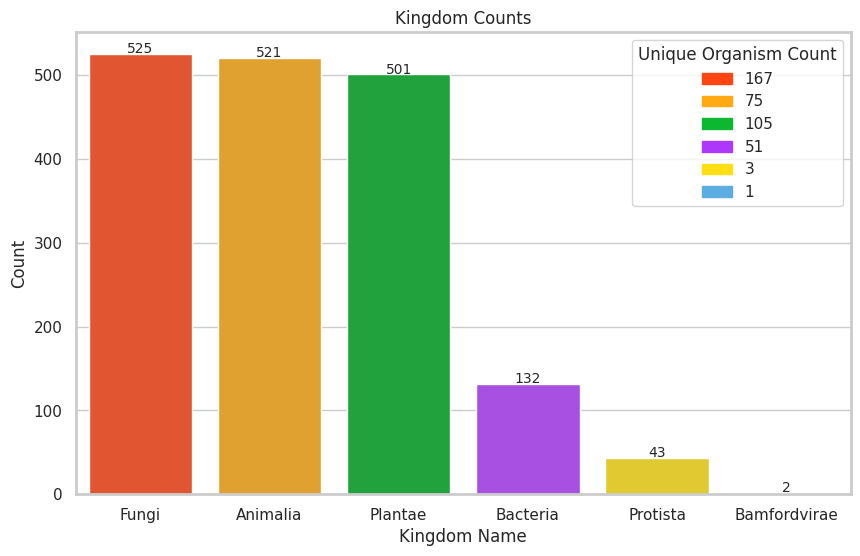

[['Fungi' 525 167]
 ['Animalia' 521 75]
 ['Plantae' 501 105]
 ['Bacteria' 132 51]
 ['Protista' 43 3]
 ['Bamfordvirae' 2 1]]


In [22]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
colors_dict = ['#FF4513','#FFA913', '#0BB830', '#AD38FA', '#FFDF13','#5DADE2']
palette = sns.color_palette(colors_dict)
sns.barplot(kingdom_counts,x='kingdom_name', y='CYP_count', palette=palette, ax=ax)
ax.set_title('Kingdom Counts')
ax.set_xlabel('Kingdom Name')
ax.set_ylabel('Count')

for i, v in enumerate(kingdom_counts['CYP_count']):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)

legend_labels = kingdom_counts['unique_organism_count'].values
handles = [plt.Rectangle((0,0),1,1, color=colors_dict[i]) for i in range(len(legend_labels))]
ax.legend(handles, legend_labels, title='Unique Organism Count', loc='upper right')

plt.savefig("./img/kingCounts.pdf", format="pdf", bbox_inches="tight")
plt.show()

print(kingdom_counts.values)


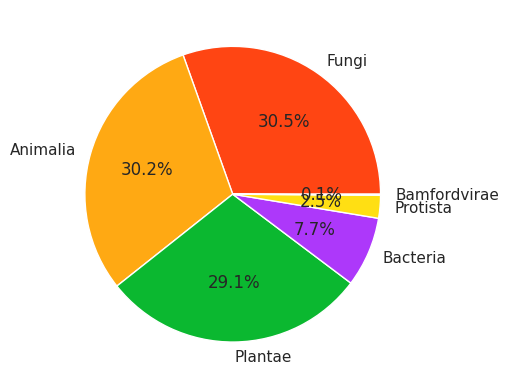

In [23]:
palette_color = ['#FF4513','#FFA913', '#0BB830', '#AD38FA', '#FFDF13','#5DADE2' ]
  
plt.pie(kingdoms_counts.values, labels=kingdoms_counts.index, colors=palette_color, autopct='%1.1f%%')

plt.savefig("./img/kingCountsPie.pdf", format="pdf", bbox_inches="tight") 
plt.show()

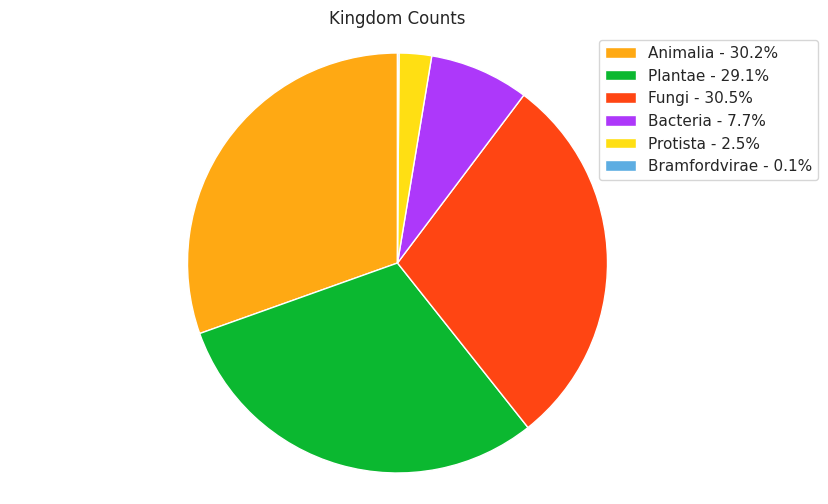

In [24]:
plt.figure(figsize=(10,6))
labels = [r'Animalia - 30.2%', r'Plantae - 29.1%', r'Fungi - 30.5%', r'Bacteria - 7.7%', r'Protista - 2.5%', r'Bramfordvirae - 0.1%']
colors = ['#FFA913', '#0BB830','#FF4513', '#AD38FA', '#FFDF13','#5DADE2']
patches, texts = plt.pie(kingdoms_counts.values,colors=colors, startangle=90)
plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(0.75, 1))
plt.title('Kingdom Counts')
plt.axis('equal')
plt.savefig("./img/kingCountsPie.pdf", format="pdf", bbox_inches="tight") 

plt.show()

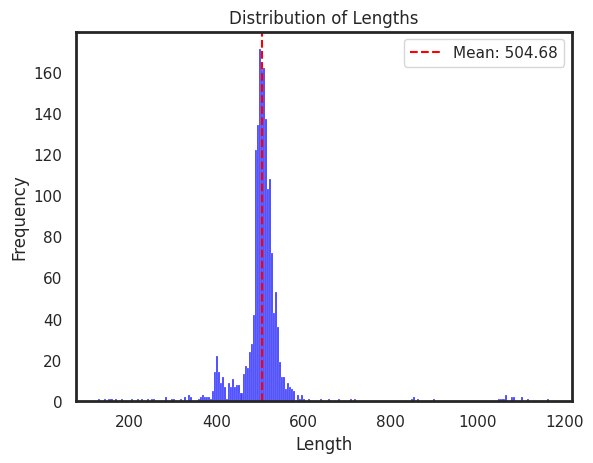

In [25]:
sns.set_style('white')
sns.histplot(data=df, x="length", kde=False, color="blue")

mean_length = df["length"].mean()
plt.axvline(mean_length, color="red", linestyle="--", label=f"Mean: {mean_length:.2f}")
plt.legend()

plt.title("Distribution of Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")

plt.show()

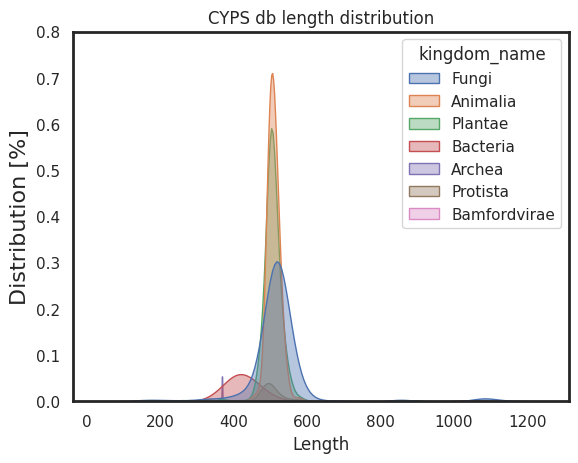

In [26]:
sns.set_style("white")

ax = sns.kdeplot(data=df, x="length", hue="kingdom_name", fill=True, alpha=.4)

plt.title("CYPS db length distribution")
plt.xlabel("Length")
plt.yticks(ax.get_yticks(), (ax.get_yticks() * 1000)/10)
plt.ylabel('Distribution [%]', fontsize=16)

plt.show()

Substrates

In [27]:
subs_df = alldf[['substrates', 'kingdom_name']]
subs_df

subs_df.columns = ['substrate_name', 'kingdom_name']

# count the occurrences of each product_chebi_id
subs_grouped_counts = pd.DataFrame(subs_df.groupby(['substrate_name','kingdom_name'],).size().sort_values().reset_index())
subs_grouped_counts.columns = ['substrate_counts','kingdom_name', 'count']
print(subs_grouped_counts.columns)
subs_counts = pd.DataFrame(subs_df['substrate_name'].value_counts().sort_values()).reset_index()
subs_grouped_counts


Index(['substrate_counts', 'kingdom_name', 'count'], dtype='object')


,substrate_counts,kingdom_name,count
0,zeinoxanthin,Plantae,1
1,dodecanoate,Bacteria,1
2,2 nataloe emodin,Fungi,1
3,dihydro-ML-236C carboxylate,Fungi,1
4,dehydroepiandrosterone 3-sulfate,Animalia,1
...,...,...,...
516,"(5Z,8Z,11Z,14Z,17Z)-eicosapentaenoate",Animalia,95
517,an organic molecule,Animalia,99
518,17beta-estradiol,Animalia,103
519,estrone,Animalia,110


In [28]:
top_10_subs = subs_counts.nlargest(11, 'substrate_name')
top_10_subs.to_csv('top_10_subs.csv')

In [29]:
values = ['(5Z,8Z,11Z,14Z)-eicosatetraenoate', 'estrone','17beta-estradiol',
                                                                      '(5Z,8Z,11Z,14Z,17Z)-eicosapentaenoate', '(4Z,7Z,10Z,13Z,16Z,19Z)-docosahexaenoate',
                                                                       'cholesterol',
                                                                      '(15S)-hydroperoxy-(5Z,8Z,11Z,13E)-eicosatetraenoate',
                                                                      'androst-4-ene-3,17-dione', '17alpha-hydroxyprogesterone', 'testosterone']
subs_grouped_counts = subs_grouped_counts.loc[subs_grouped_counts['substrate_counts'].isin(values)]
subs_grouped_counts

,substrate_counts,kingdom_name,count
223,cholesterol,Bacteria,2
421,cholesterol,Plantae,5
510,testosterone,Animalia,45
511,17alpha-hydroxyprogesterone,Animalia,49
512,"androst-4-ene-3,17-dione",Animalia,50
513,"(15S)-hydroperoxy-(5Z,8Z,11Z,13E)-eicosatetrae...",Animalia,54
514,cholesterol,Animalia,58
515,"(4Z,7Z,10Z,13Z,16Z,19Z)-docosahexaenoate",Animalia,80
516,"(5Z,8Z,11Z,14Z,17Z)-eicosapentaenoate",Animalia,95
518,17beta-estradiol,Animalia,103


Text(0.5, 1.0, '10 Most common substrates')

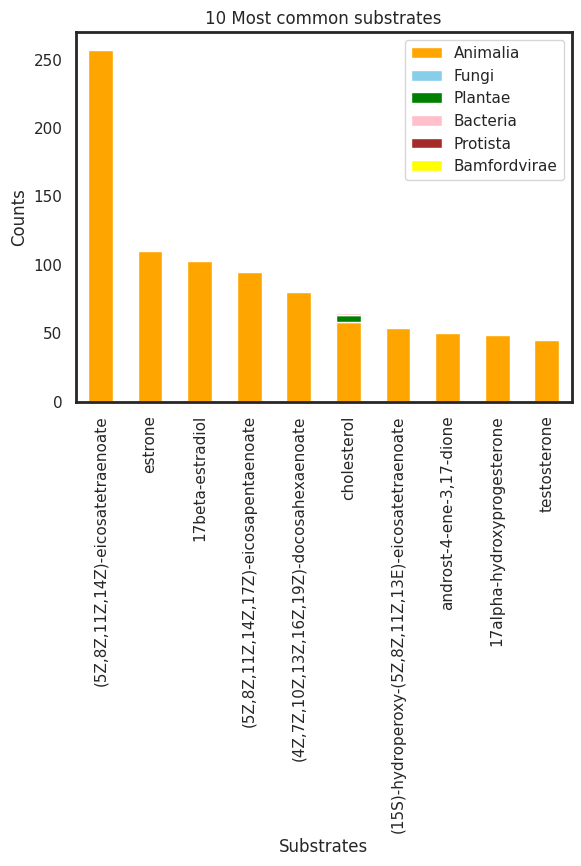

In [30]:
df = pd.DataFrame({'Animalia': [257, 110, 103, 95, 80, 58,
                                 54, 50,49, 45],
                   'Fungi': [0, 0, 0, 0, 0, 0, 0,
                                0, 0, 0],
                   'Plantae': [0, 0, 0, 0, 0, 5,
                                0, 0, 0, 0],
                     'Bacteria': [0,0,0,0,0,2,0,0,0,0],
                     'Protista': [0,0,0,0,0,0,0,0,0,0],
                     'Bamfordvirae' : [0,0,0,0,0,0,0,0,0,0] 
},
                  index=['(5Z,8Z,11Z,14Z)-eicosatetraenoate', 'estrone','17beta-estradiol',
                            '(5Z,8Z,11Z,14Z,17Z)-eicosapentaenoate', '(4Z,7Z,10Z,13Z,16Z,19Z)-docosahexaenoate',
                            'cholesterol','(15S)-hydroperoxy-(5Z,8Z,11Z,13E)-eicosatetraenoate',
                            'androst-4-ene-3,17-dione', '17alpha-hydroxyprogesterone', 'testosterone'])

df.plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'green', 'pink', 'brown', 'yellow'])
 
plt.xlabel('Substrates')
plt.ylabel('Counts')
 
plt.title('10 Most common substrates')

Products

In [31]:
product_df = alldf[['products', 'kingdom_name']]
product_df

,products,kingdom_name
0,gentisyl alcohol,Fungi
1,3-hydroxybenzyl alcohol,Fungi
2,an alcohol,Animalia
3,ferruginol,Plantae
4,11-hydroxyferruginol,Plantae
...,...,...
3775,NaN,Plantae
3776,NaN,Plantae
3777,NaN,Plantae
3778,NaN,Plantae


In [32]:
product_df.columns = ['product_name', 'kingdom_name']

product_grouped_counts = pd.DataFrame(product_df.groupby(['product_name','kingdom_name'],).size().sort_values().reset_index())
product_grouped_counts.columns = ['product_counts','kingdom_name', 'count']
print(product_grouped_counts.columns)
product_counts = pd.DataFrame(product_df['product_name'].value_counts().sort_values()).reset_index()
product_grouped_counts

Index(['product_counts', 'kingdom_name', 'count'], dtype='object')


,product_counts,kingdom_name,count
0,zealexin A1,Plantae,1
1,6-deoxoteasterone,Plantae,1
2,6-carboxyhexanoyl-[ACP];a fatty aldehyde,Bacteria,1
3,"5beta-cholestane-3alpha,7alpha,25-triol",Animalia,1
4,"5beta-cholestane-3alpha,7alpha,12alpha,25-tetrol",Animalia,1
...,...,...,...
723,"(14S,15R)-epoxy-(5Z,8Z,11Z)-eicosatrienoate",Animalia,36
724,"(14R,15S)-epoxy-(5Z,8Z,11Z)-eicosatrienoate",Animalia,36
725,2-hydroxyestrone,Animalia,40
726,"15-oxo-(5Z,8Z,11Z,13E)-eicosatetraenoate",Animalia,41


In [33]:
top_10_products = product_counts.nlargest(11, 'product_name')
top_10_products.to_csv('top_10_products.csv')


In [34]:
values = ['15-oxo-(5Z,8Z,11Z,13E)-eicosatetraenoate', '2-hydroxyestrone','(14R,15S)-epoxy-(5Z,8Z,11Z)-eicosatrienoate',
                                                                      '(14S,15R)-epoxy-(5Z,8Z,11Z)-eicosatrienoate', 'a Delta(14) steroid;formate', '(17R,18S)-epoxy-(5Z,8Z,11Z,14Z)-eicosatetraenoate',
                                                                      '19-hydroxy-(5Z,8Z,11Z,14Z)-eicosatetraenoate',
                                                                      'all-trans-retinal', '2-hydroxy-17beta-estradiol', '(19R,20S)-epoxy-(4Z,7Z,10Z,13Z,16Z)-docosapentaenoate']
product_grouped_counts = product_grouped_counts.loc[product_grouped_counts['product_counts'].isin(values)]
product_grouped_counts

,product_counts,kingdom_name,count
184,a Delta(14) steroid;formate,Bamfordvirae,1
382,a Delta(14) steroid;formate,Protista,2
532,a Delta(14) steroid;formate,Plantae,3
572,a Delta(14) steroid;formate,Bacteria,4
641,a Delta(14) steroid;formate,Animalia,8
694,a Delta(14) steroid;formate,Fungi,17
718,"(19R,20S)-epoxy-(4Z,7Z,10Z,13Z,16Z)-docosapent...",Animalia,32
719,2-hydroxy-17beta-estradiol,Animalia,33
720,all-trans-retinal,Animalia,33
721,"19-hydroxy-(5Z,8Z,11Z,14Z)-eicosatetraenoate",Animalia,34


Text(0.5, 1.0, '10 Most common products')

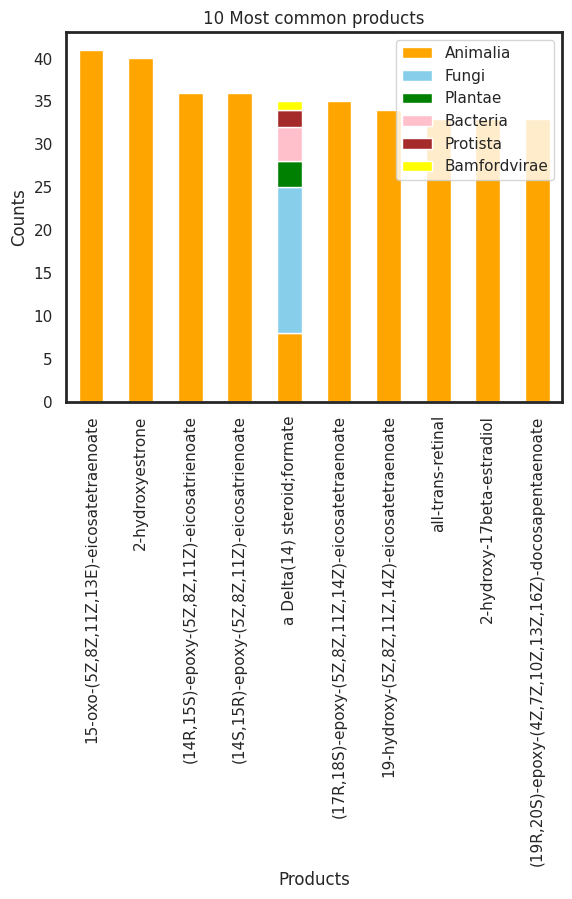

In [35]:
df = pd.DataFrame({'Animalia': [41, 40, 36, 36, 8, 35,
                                 34, 33,33, 33],
                   'Fungi': [0, 0, 0, 0, 17, 0, 0,
                                0, 0, 0],
                   'Plantae': [0, 0, 0, 0, 3, 0,
                                0, 0, 0, 0],
                     'Bacteria': [0,0,0,0,4,0,0,0,0,0],
                     'Protista': [0,0,0,0,2,0,0,0,0,0],
                     'Bamfordvirae' : [0,0,0,0,1,0,0,0,0,0] 
},
                  index=['15-oxo-(5Z,8Z,11Z,13E)-eicosatetraenoate', '2-hydroxyestrone', '(14R,15S)-epoxy-(5Z,8Z,11Z)-eicosatrienoate', '(14S,15R)-epoxy-(5Z,8Z,11Z)-eicosatrienoate', 'a Delta(14) steroid;formate',
                         '(17R,18S)-epoxy-(5Z,8Z,11Z,14Z)-eicosatetraenoate', '19-hydroxy-(5Z,8Z,11Z,14Z)-eicosatetraenoate', 'all-trans-retinal', '2-hydroxy-17beta-estradiol', '(19R,20S)-epoxy-(4Z,7Z,10Z,13Z,16Z)-docosapentaenoate'])

df.plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'green', 'pink', 'brown', 'yellow'])
 
plt.xlabel('Products')
plt.ylabel('Counts')
 
plt.title('10 Most common products')

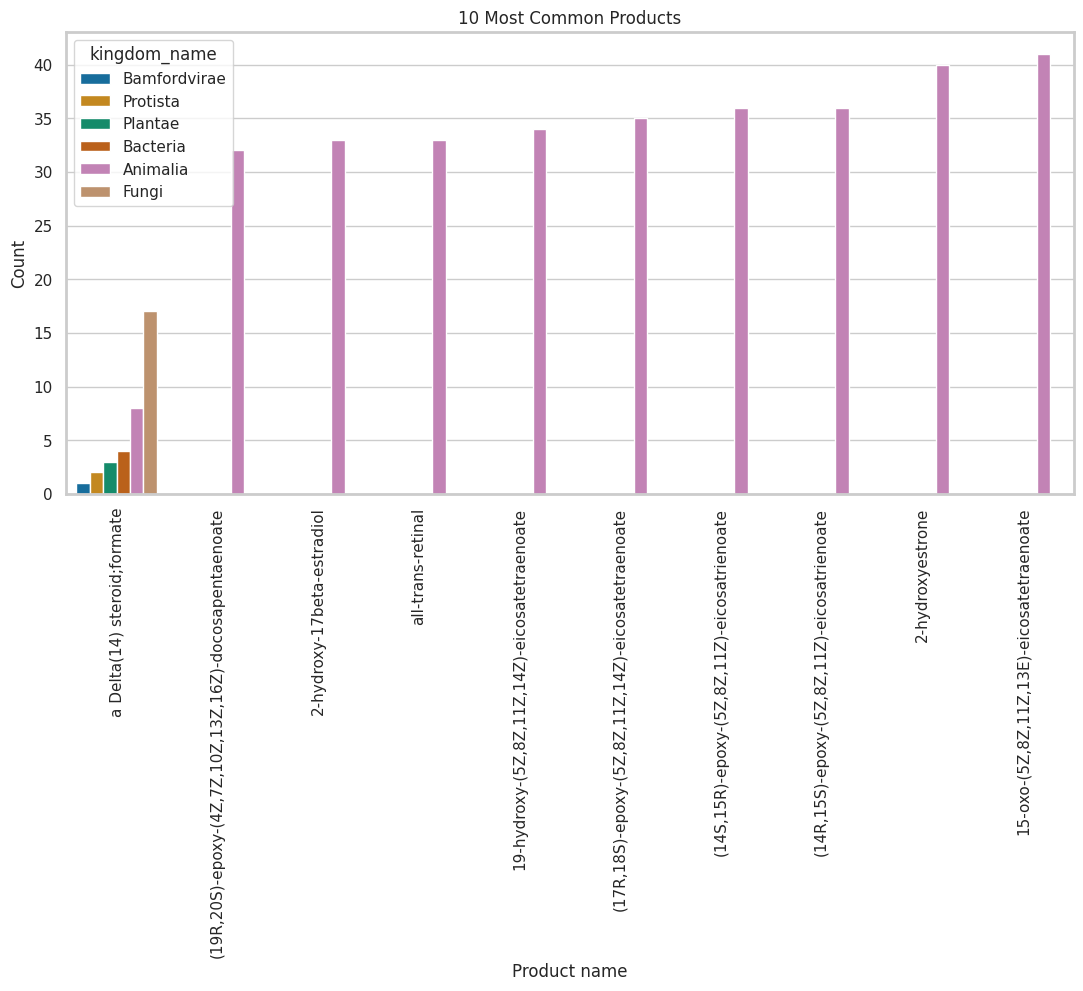

In [36]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(13, 6)) # set plot size
sns.barplot(x='product_counts', y='count', hue='kingdom_name', data=product_grouped_counts, palette='colorblind', ax=ax)
ax.set_title('10 Most Common Products')
ax.set_xlabel('Product name')
ax.set_ylabel('Count')

plt.xticks(rotation=90)
plt.show()

In [37]:
pfams = pd.read_csv("./pfams.csv", index_col='protein', sep=',')
pfams = pfams.fillna("MISSING VALUE")
pfams.columns

Index(['pfam'], dtype='object')

In [38]:
df_wo_missvalue.columns


Index(['protein', 'name', 'reaction', 'rheaID', 'substrates',
       'Substrate CHEBI ID', 'Substrate SMILES', 'reducing_agent', 'cofactor',
       'products', 'Product CHEBI ID', 'Product SMILES', 'organism_name',
       'kingdom_name', 'superkingdom_name', 'sequence', 'length',
       'additional info'],
      dtype='object')

In [39]:
merged_df_with_pfams = pd.merge(df_wo_missvalue, pfams, left_on='protein', right_index=True)
merged_df_with_pfams.shape

(1761, 19)

In [40]:
pfamsCount = pd.DataFrame(merged_df_with_pfams['pfam'].value_counts().reset_index())
pfamsCount.columns = ['Pfam', 'Count']
print(pfamsCount)

      Pfam  Count
0  PF00067   1724
1  PF00258      9
2  PF00667      9
3  PF00175      9
4  PF03098      5
5  PF00753      4
6  PF00248      1


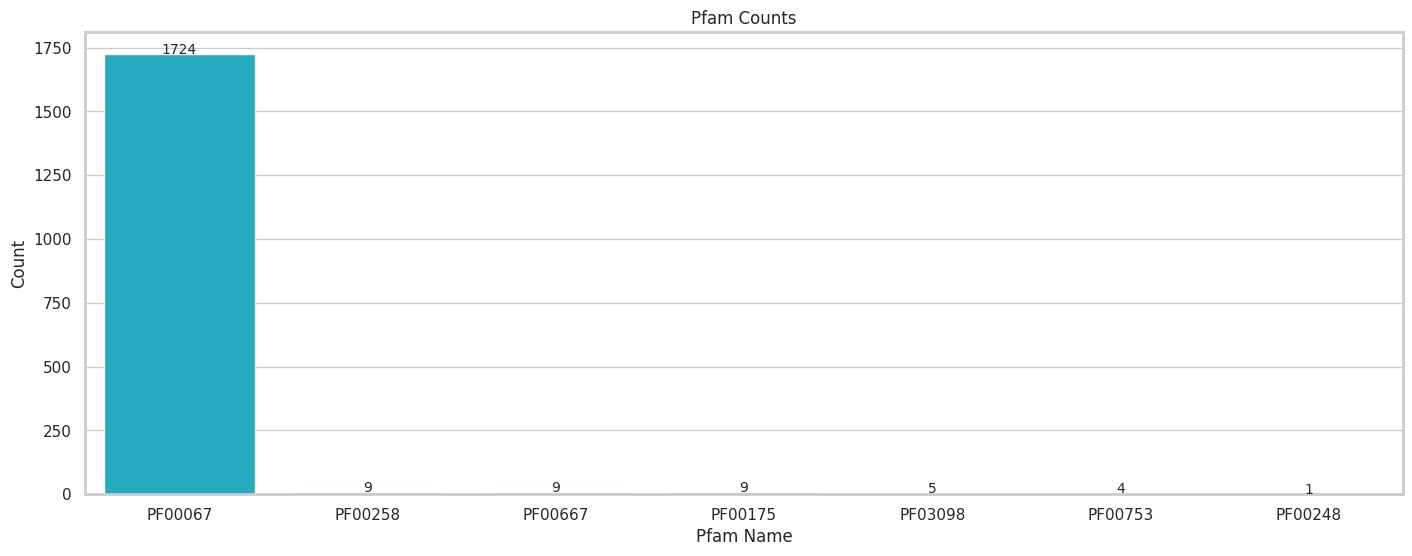

In [41]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(17, 6))
colors = ['#0ABEDA','#F0697B', '#FCB502','#05D470','#C589FA', '#B77F05', '#B04F05' ]
palette = sns.color_palette(colors)
sns.barplot(x=pfamsCount['Pfam'], y=pfamsCount['Count'], palette=palette, ax=ax)
ax.set_title('Pfam Counts')
ax.set_xlabel('Pfam Name')
ax.set_ylabel('Count')

for i, v in enumerate(pfamsCount['Count']):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)

plt.show()

In [42]:
merged_df_with_pfams.columns

Index(['protein', 'name', 'reaction', 'rheaID', 'substrates',
       'Substrate CHEBI ID', 'Substrate SMILES', 'reducing_agent', 'cofactor',
       'products', 'Product CHEBI ID', 'Product SMILES', 'organism_name',
       'kingdom_name', 'superkingdom_name', 'sequence', 'length',
       'additional info', 'pfam'],
      dtype='object')

In [43]:
grouped = merged_df_with_pfams.groupby(['pfam', 'length', 'protein']).size().reset_index(name='counts')

print(grouped)

         pfam  length protein  counts
0     PF00067     129  Q0CJ54       1
1     PF00067     146  Q6ZSU1       1
2     PF00067     155  P85191       1
3     PF00067     159  G3XSI3       1
4     PF00067     170  P9WEY9       1
...       ...     ...     ...     ...
1756  PF03098    1079  B0Y6R2       1
1757  PF03098    1079  Q4WPX2       1
1758  PF03098    1081  G5EB19       1
1759  PF03098    1081  Q6RET3       1
1760  PF03098    1165  Q9UUS2       1

[1761 rows x 4 columns]


/root/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/root/.pyenv/versions/3.10.9/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


Text(0.5, 0.98, 'CYPs PFAM-length distributions')

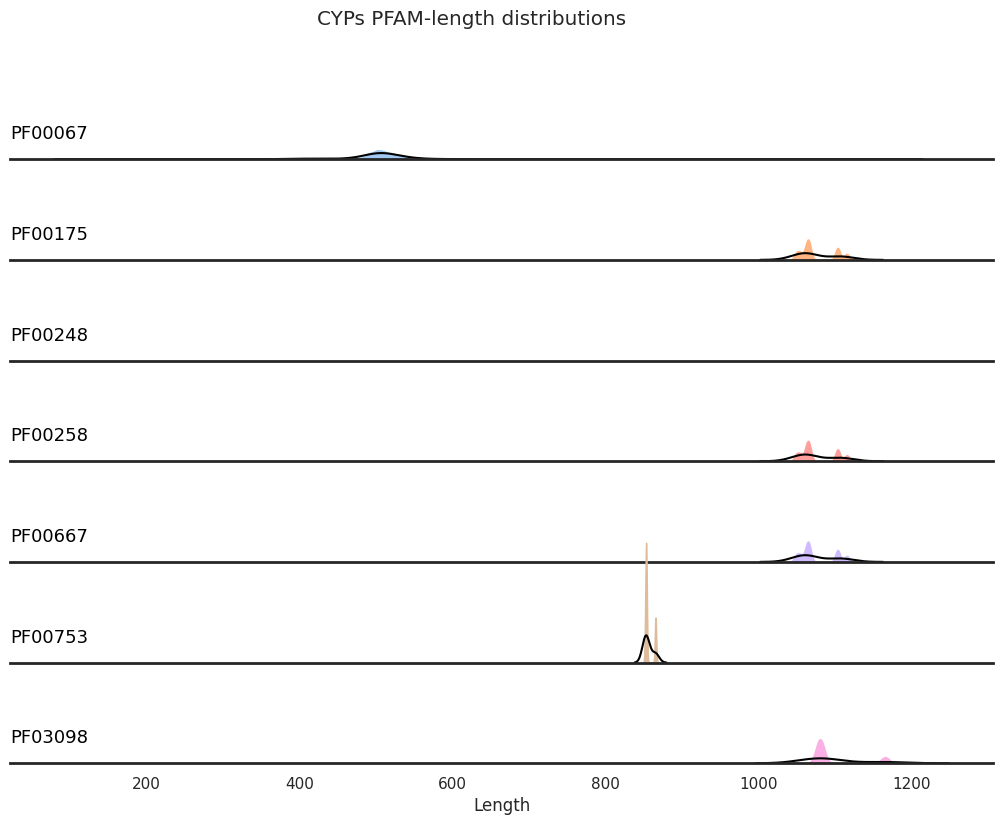

In [44]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("pastel", 12)
g = sns.FacetGrid(grouped, palette=palette, row="pfam", hue="pfam", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.2)
g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None)
g.despine( left=True)
plt.suptitle('CYPs PFAM-length distributions', y=0.98)

In [45]:
pf00753 = grouped[grouped.pfam == 'PF00753']
pf00753

,pfam,length,protein,counts
1752,PF00753,852,W6QRN8,1
1753,PF00753,853,A0A0B5KYT4,1
1754,PF00753,853,I7LRH3,1
1755,PF00753,865,A0A097ZPE4,1


W6QRN8. A0A0B5KYT4, I7LRH3, A0A097ZPE4 - not in the long ones

In [46]:
pf00067 = grouped[grouped.pfam == 'PF00067']
pf00067
# is in all CYPs because I searched 

,pfam,length,protein,counts
0,PF00067,129,Q0CJ54,1
1,PF00067,146,Q6ZSU1,1
2,PF00067,155,P85191,1
3,PF00067,159,G3XSI3,1
4,PF00067,170,P9WEY9,1
...,...,...,...,...
1719,PF00067,1081,Q6RET3,1
1720,PF00067,1103,A0A3G9HRC2,1
1721,PF00067,1103,Q2UNA2,1
1722,PF00067,1115,Q9HGE0,1


In [47]:
pf00175 = grouped[grouped.pfam == 'PF00175']
pf00175

,pfam,length,protein,counts
1724,PF00175,1049,P14779,1
1725,PF00175,1054,O08336,1
1726,PF00175,1061,O08394,1
1727,PF00175,1064,A0A455R5H4,1
1728,PF00175,1065,Q81BF4,1
1729,PF00175,1066,Q9Y8G7,1
1730,PF00175,1103,A0A3G9HRC2,1
1731,PF00175,1103,Q2UNA2,1
1732,PF00175,1115,Q9HGE0,1


In [48]:
pf00248 = grouped[grouped.pfam == 'PF00248']
pf00248

,pfam,length,protein,counts
1733,PF00248,901,P0DKI7,1


In [49]:
pf00258 = grouped[grouped.pfam == 'PF00258']
pf00258

,pfam,length,protein,counts
1734,PF00258,1049,P14779,1
1735,PF00258,1054,O08336,1
1736,PF00258,1061,O08394,1
1737,PF00258,1064,A0A455R5H4,1
1738,PF00258,1065,Q81BF4,1
1739,PF00258,1066,Q9Y8G7,1
1740,PF00258,1103,A0A3G9HRC2,1
1741,PF00258,1103,Q2UNA2,1
1742,PF00258,1115,Q9HGE0,1


In [50]:
pf00667 = grouped[grouped.pfam == 'PF00667']
pf00667

,pfam,length,protein,counts
1743,PF00667,1049,P14779,1
1744,PF00667,1054,O08336,1
1745,PF00667,1061,O08394,1
1746,PF00667,1064,A0A455R5H4,1
1747,PF00667,1065,Q81BF4,1
1748,PF00667,1066,Q9Y8G7,1
1749,PF00667,1103,A0A3G9HRC2,1
1750,PF00667,1103,Q2UNA2,1
1751,PF00667,1115,Q9HGE0,1


In [51]:
pf03098 = grouped[grouped.pfam == 'PF03098']
pf03098

,pfam,length,protein,counts
1756,PF03098,1079,B0Y6R2,1
1757,PF03098,1079,Q4WPX2,1
1758,PF03098,1081,G5EB19,1
1759,PF03098,1081,Q6RET3,1
1760,PF03098,1165,Q9UUS2,1


ALL CYPs 

In [52]:
allCYPs = pd.read_csv("allCYPs.csv")

In [53]:
allCYPs.shape

(484323, 6)

In [54]:
allCYPs.columns

Index(['full_submitted_name', 'organism_name', 'kingdom_name', 'sequence',
       'pfam', 'length'],
      dtype='object')

In [55]:
allCYPs.loc[allCYPs['kingdom_name'] == 'MISSING VALUE', 'kingdom_name'] = 'Protista'

In [56]:
kingdom_counts_all = allCYPs.groupby('kingdom_name').size().reset_index(name='count')
kingdom_counts_all

,kingdom_name,count
0,Animalia,111433
1,Bacteria,127979
2,Bamfordvirae,77
3,Fungi,135973
4,Heunggongvirae,4
5,Plantae,100739
6,Protista,8118


In [57]:
kingdom_counts_all.loc[len(kingdom_counts_all.index)] = ['Viruses', 81]
kingdom_counts_all = kingdom_counts_all[kingdom_counts_all.kingdom_name != 'Bamfordvirae']
new_kingdom_counts_all = kingdom_counts_all[kingdom_counts_all.kingdom_name != 'Heunggongvirae']
new_kingdom_counts_all

,kingdom_name,count
0,Animalia,111433
1,Bacteria,127979
3,Fungi,135973
5,Plantae,100739
6,Protista,8118
7,Viruses,81


In [58]:
allCYPs.loc[allCYPs['kingdom_name'] == 'Animalia', 'kingdom_name'] = 'Animalia n = 111 433'
allCYPs.loc[allCYPs['kingdom_name'] == 'Viruses', 'kingdom_name'] = 'Viruses n = 81'
allCYPs.loc[allCYPs['kingdom_name'] == 'Bacteria', 'kingdom_name'] = 'Bacteria n = 127 979'
allCYPs.loc[allCYPs['kingdom_name'] == 'Fungi', 'kingdom_name'] = 'Fungi n = 135 973'
allCYPs.loc[allCYPs['kingdom_name'] == 'Plantae', 'kingdom_name'] = 'Plantae n = 100 739'
allCYPs.loc[allCYPs['kingdom_name'] == 'Protista', 'kingdom_name'] = 'Protista n = 8118'
allCYPs.loc[allCYPs['kingdom_name'] == 'Bamfordvirae', 'kingdom_name'] = 'Bamfordvirae n = 77'
allCYPs.loc[allCYPs['kingdom_name'] == 'Heunggongvirae', 'kingdom_name'] = 'Heunggongvirae n = 4'

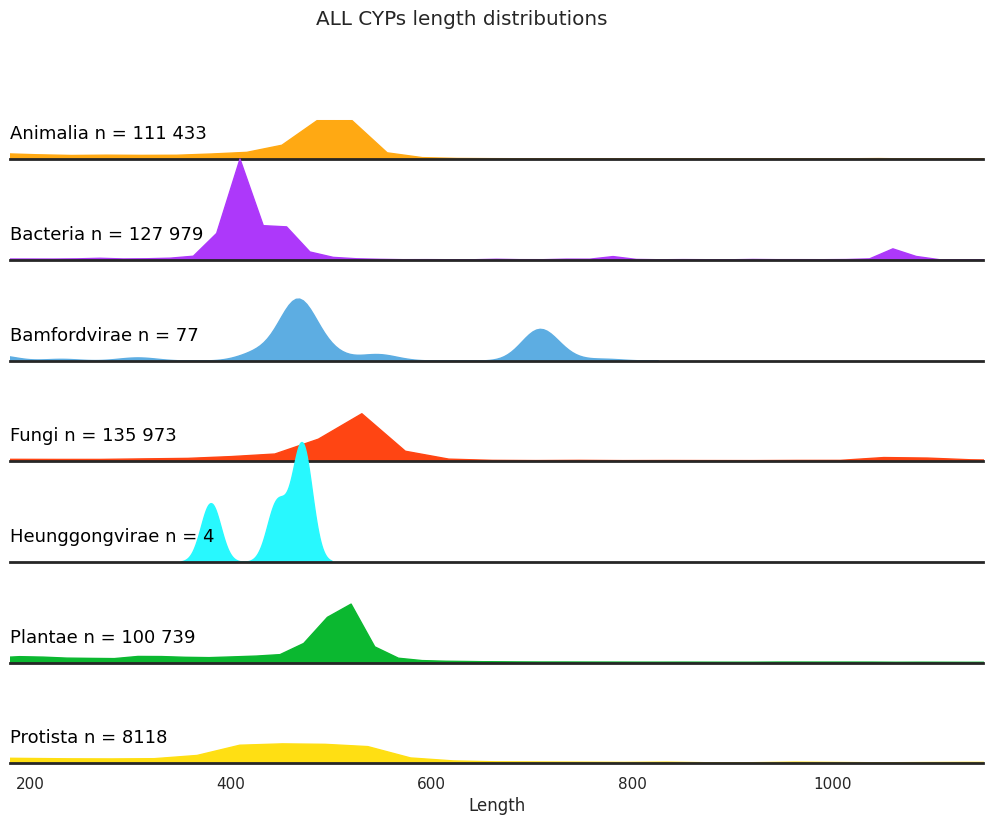

In [59]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
colors_dict = {'Animalia n = 111 433': '#FFA913', 'Fungi n = 135 973': '#FF4513', 'Plantae n = 100 739': '#0BB830', 'Bacteria n = 127 979': '#AD38FA', 'Bamfordvirae n = 77': '#5DADE2', 'Heunggongvirae n = 4': '#28F8FE', 'Protista n = 8118': '#FFDF13'}
# palette = sns.color_palette(colors)
order = sorted(allCYPs["kingdom_name"].unique())
g = sns.FacetGrid(allCYPs, palette=colors_dict, row="kingdom_name", hue="kingdom_name", aspect=9, height=1.2, row_order=order)
g.map_dataframe(sns.kdeplot, x="length", fill=True, alpha=1, bw_adjust=0.3)
#g.map_dataframe(sns.kdeplot, x="length", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "length")
g.fig.subplots_adjust(hspace=-.2)
g.set_titles("")
g.set(yticks=[], xlabel="Length",ylabel=None, xlim=(180,1150))
g.despine( left=True)
plt.suptitle('ALL CYPs length distributions', y=0.98)
plt.savefig("./img/allLenDist.pdf", format="pdf", bbox_inches="tight")

In [60]:
allCYPs.loc[allCYPs['kingdom_name'] == 'Animalia n = 111 433', 'kingdom_name'] = 'Animalia'
allCYPs.loc[allCYPs['kingdom_name'] == 'Viruses n = 81', 'kingdom_name'] = 'Viruses'
allCYPs.loc[allCYPs['kingdom_name'] == 'Bacteria n = 127 979', 'kingdom_name'] = 'Bacteria'
allCYPs.loc[allCYPs['kingdom_name'] == 'Fungi n = 135 973', 'kingdom_name'] = 'Fungi'
allCYPs.loc[allCYPs['kingdom_name'] == 'Plantae n = 100 739', 'kingdom_name'] = 'Plantae'
allCYPs.loc[allCYPs['kingdom_name'] == 'Protista n = 8118', 'kingdom_name'] = 'Protista'
allCYPs.loc[allCYPs['kingdom_name'] == 'Bamfordvirae n = 77', 'kingdom_name'] = 'Bamfordvirae'
allCYPs.loc[allCYPs['kingdom_name'] == 'Heunggongvirae n = 4', 'kingdom_name'] = 'Heunggongvirae'

In [61]:
kingdoms_df_all = allCYPs[['kingdom_name']]

In [62]:
unique_orgs_by_kingdom = allCYPs.groupby('kingdom_name')['organism_name'].nunique()

kingdom_org_counts_all = pd.DataFrame({'kingdom_name': unique_orgs_by_kingdom.index, 'unique_organism_count': unique_orgs_by_kingdom.values})
kingdom_org_counts_all

,kingdom_name,unique_organism_count
0,Animalia,1850
1,Bacteria,12518
2,Bamfordvirae,38
3,Fungi,1522
4,Heunggongvirae,4
5,Plantae,1283
6,Protista,717


In [63]:
kingdom_counts_all = kingdoms_df_all['kingdom_name'].value_counts()
kingdom_counts_all = pd.DataFrame({'kingdom_name': kingdom_counts_all.index, 'count': kingdom_counts_all.values})

In [64]:
kingdom_counts_all = pd.merge(kingdom_counts_all, kingdom_org_counts_all, on='kingdom_name')
kingdom_counts_all.columns = ['kingdom_name', 'CYP_count', 'unique_organism_count']
kingdom_counts_all

,kingdom_name,CYP_count,unique_organism_count
0,Fungi,135973,1522
1,Bacteria,127979,12518
2,Animalia,111433,1850
3,Plantae,100739,1283
4,Protista,8118,717
5,Bamfordvirae,77,38
6,Heunggongvirae,4,4


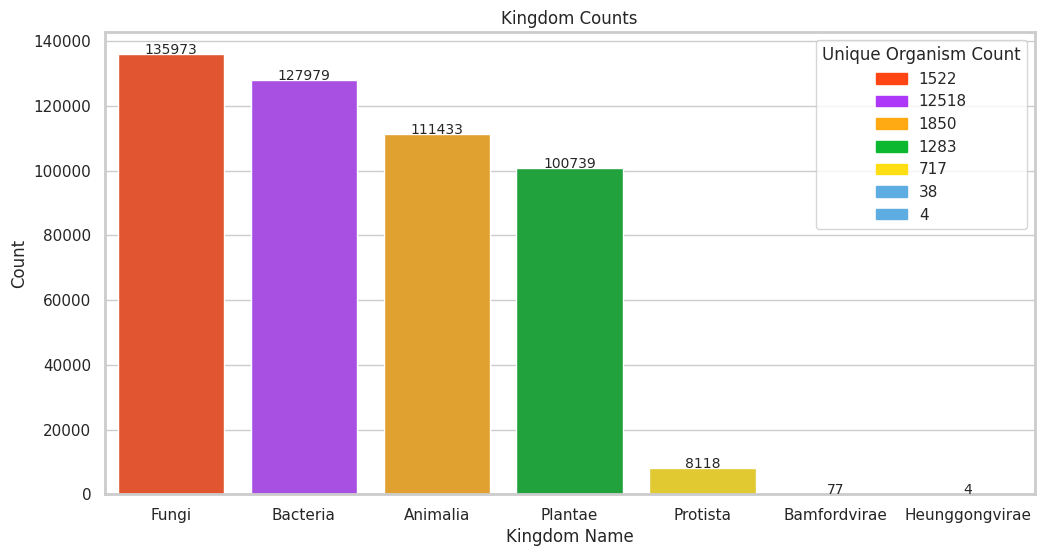

[['Fungi' 135973 1522]
 ['Bacteria' 127979 12518]
 ['Animalia' 111433 1850]
 ['Plantae' 100739 1283]
 ['Protista' 8118 717]
 ['Bamfordvirae' 77 38]
 ['Heunggongvirae' 4 4]]


In [65]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
colors_dict = ['#FF4513','#AD38FA','#FFA913','#0BB830', '#FFDF13','#5DADE2','#5DADE2']
palette = sns.color_palette(colors_dict)
sns.barplot(kingdom_counts_all,x='kingdom_name', y='CYP_count', palette=palette, ax=ax)
ax.set_title('Kingdom Counts')
ax.set_xlabel('Kingdom Name')
ax.set_ylabel('Count')

for i, v in enumerate(kingdom_counts_all['CYP_count']):
    ax.text(i, v + 1, str(v), ha='center', fontsize=10)

legend_labels = kingdom_counts_all['unique_organism_count'].values
handles = [plt.Rectangle((0,0),1,1, color=colors_dict[i]) for i in range(len(legend_labels))]
ax.legend(handles, legend_labels, title='Unique Organism Count', loc='upper right')

plt.savefig("./img/kingCounts_all.pdf", format="pdf", bbox_inches="tight")
plt.show()

print(kingdom_counts_all.values)

In [66]:
kingdom_counts_all = kingdom_counts_all.iloc[:-2] # removing last to columns

In [67]:
pfams_df = allCYPs[['pfam']]

In [68]:
pfams_counts = pfams_df['pfam'].value_counts()
pfams_counts = pfams_counts[pfams_counts > 100]
pfams_counts

PF00067    457480
PF00175      4229
PF00258      4116
PF00667      3949
PF03098      1496
PF00111       945
PF07690       251
PF05719       230
PF00970       221
PF04082       213
PF00069       178
PF00106       152
PF13459       140
PF00501       134
PF00172       119
PF07992       107
PF00550       103
Name: pfam, dtype: int64

In [74]:
df_wo_missvalue.columns

Index(['protein', 'name', 'reaction', 'rheaID', 'substrates',
       'Substrate CHEBI ID', 'Substrate SMILES', 'reducing_agent', 'cofactor',
       'products', 'Product CHEBI ID', 'Product SMILES', 'organism_name',
       'kingdom_name', 'superkingdom_name', 'sequence', 'length',
       'additional info'],
      dtype='object')

In [75]:
df_wo_missvalue = df_wo_missvalue.drop_duplicates(subset=['sequence'])
df_wo_missvalue.shape

(1677, 18)

Organisms with the most sequences

In [76]:
organism_df = df_wo_missvalue[['organism_name', 'kingdom_name']]
organism_df.loc[:, 'organism_name'] = organism_df['organism_name'].str.replace(r"\(.*\)", "", regex=True)

/tmp/ipykernel_720/675063056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organism_df.loc[:, 'organism_name'] = organism_df['organism_name'].str.replace(r"\(.*\)", "", regex=True)


In [77]:
organism_df =organism_df.groupby(['organism_name', 'kingdom_name']).size()

In [78]:
organism_df.columns = ['organism_name', 'kingdom_name', 'count']

In [79]:
organism_df.columns

['organism_name', 'kingdom_name', 'count']

In [80]:
organisms_sorted = organism_df.sort_values(ascending=False)

In [81]:
organisms_sorted.head(50)

organism_name                 kingdom_name
Arabidopsis thaliana          Plantae         141
Drosophila melanogaster       Animalia         86
Mus musculus                  Animalia         64
Rattus norvegicus             Animalia         63
Homo sapiens                  Animalia         60
Oryza sativa subsp. japonica  Plantae          46
Dictyostelium discoideum      Protista         41
Postia placenta               Fungi            34
Oryctolagus cuniculus         Animalia         29
Neosartorya fumigata          Fungi            22
Catharanthus roseus           Plantae          21
Glycine max                   Plantae          18
Emericella nidulans           Fungi            18
Mesocricetus auratus          Animalia         18
Sus scrofa                    Animalia         18
Aspergillus flavus            Fungi            17
Aspergillus oryzae            Fungi            15
Mycobacterium tuberculosis    Bacteria         15
Bos taurus                    Animalia         14
Solanum

In [82]:
top_organisms = organisms_sorted[:15]
top_organisms

organism_name                 kingdom_name
Arabidopsis thaliana          Plantae         141
Drosophila melanogaster       Animalia         86
Mus musculus                  Animalia         64
Rattus norvegicus             Animalia         63
Homo sapiens                  Animalia         60
Oryza sativa subsp. japonica  Plantae          46
Dictyostelium discoideum      Protista         41
Postia placenta               Fungi            34
Oryctolagus cuniculus         Animalia         29
Neosartorya fumigata          Fungi            22
Catharanthus roseus           Plantae          21
Glycine max                   Plantae          18
Emericella nidulans           Fungi            18
Mesocricetus auratus          Animalia         18
Sus scrofa                    Animalia         18
dtype: int64

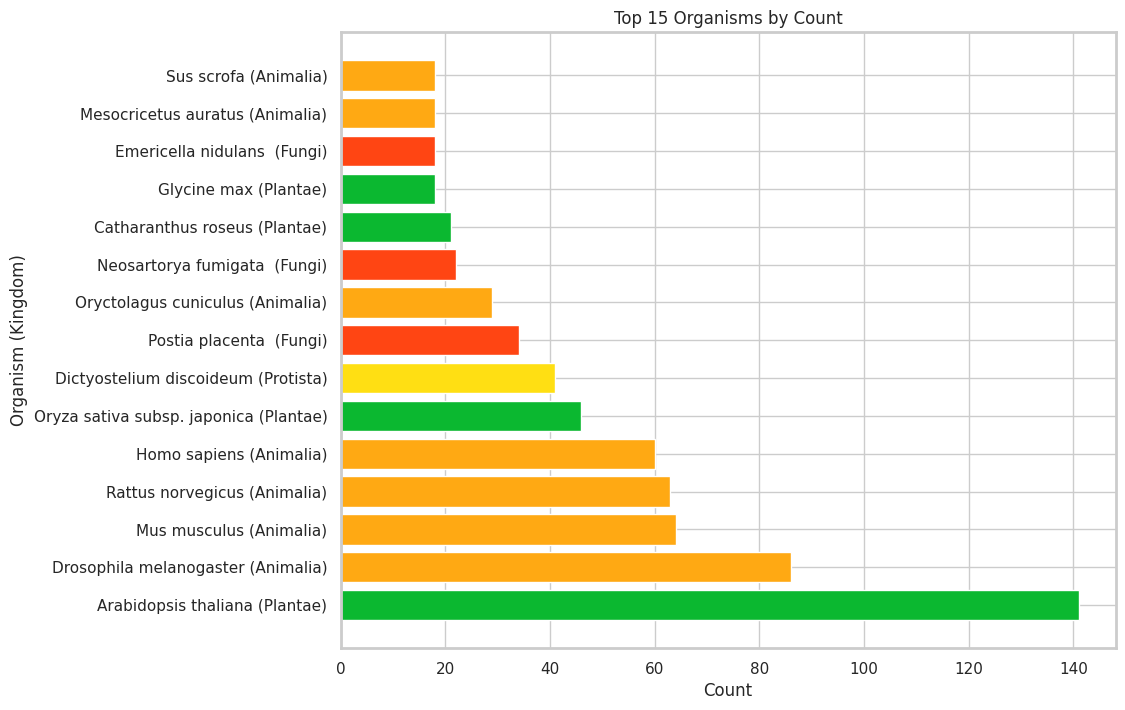

In [83]:
fig, ax = plt.subplots(figsize=(10, 8))

color_map = top_organisms.index.get_level_values(1).map({'Animalia': '#FFA913', 'Plantae': '#0BB830', 'Fungi': '#FF4513', 'Bacteria': '#AD38FA', 'Protista': '#FFDF13'})
organism_names = [f"{name[0]} ({name[1]})" for name in top_organisms.index]
ax.barh(organism_names, top_organisms.values, color=color_map)

ax.set_xlabel('Count')
ax.set_ylabel('Organism (Kingdom)')
ax.set_title('Top 15 Organisms by Count')
plt.savefig("./img/topOrgDB.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [84]:
allCYPs.loc[allCYPs['kingdom_name'] == 'Animalia n = 111 433', 'kingdom_name'] = 'Animalia'
allCYPs.loc[allCYPs['kingdom_name'] == 'Bamfordvirae n = 77', 'kingdom_name'] = 'Bamfordvirae'
allCYPs.loc[allCYPs['kingdom_name'] == 'Bacteria n = 127 979', 'kingdom_name'] = 'Bacteria'
allCYPs.loc[allCYPs['kingdom_name'] == 'Fungi n = 135 973', 'kingdom_name'] = 'Fungi'
allCYPs.loc[allCYPs['kingdom_name'] == 'Plantae n = 100 739', 'kingdom_name'] = 'Plantae'
allCYPs.loc[allCYPs['kingdom_name'] == 'Viruses  n = 4', 'kingdom_name'] = 'Viruses'


In [85]:
allCYPs = allCYPs.drop_duplicates(subset=['sequence'])
allCYPs.shape

(432909, 6)

In [86]:
organism_df_all = allCYPs[['organism_name', 'kingdom_name']]
organism_df_all.loc[:, 'organism_name'] = organism_df_all['organism_name'].str.replace(r"\(.*\)", "", regex=True)

/tmp/ipykernel_720/2088683200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organism_df_all.loc[:, 'organism_name'] = organism_df_all['organism_name'].str.replace(r"\(.*\)", "", regex=True)


In [87]:
organism_df_all =organism_df_all.groupby(['organism_name', 'kingdom_name']).size()
organism_df_all

organism_name                         kingdom_name
 x Huso huso                          Animalia          1
'Streptomyces viridis'  Waksman 1953  Bacteria          1
Aaosphaeria arxii CBS 175.79          Fungi           138
Abditibacteriota bacterium            Bacteria          4
Abditibacterium utsteinense           Bacteria          2
                                                     ... 
uncultured organism CA915             Protista          3
uncultured soil bacterium             Bacteria         10
unidentified eubacterium SCB49        Bacteria          1
viral metagenome                      Protista          7
x Doritaenopsis hybrid cultivar       Plantae           1
Length: 17296, dtype: int64

In [88]:
organism_df.columns = ['organism_name', 'kingdom_name', 'count']

In [89]:
organisms_sorted_all = organism_df_all.sort_values(ascending=False)

In [90]:
top_organisms_all = organisms_sorted_all[:18]
top_organisms_all

organism_name                         kingdom_name
Rhizoctonia solani                    Fungi           2436
Aureobasidium pullulans               Fungi           1824
Triticum aestivum                     Plantae         1766
Actinomycetia bacterium               Bacteria        1721
Aegilops tauschii subsp. strangulata  Plantae         1566
Vitis vinifera                        Plantae         1382
Sus scrofa                            Animalia        1336
Cyprinus carpio                       Animalia        1282
Acidimicrobiaceae bacterium           Bacteria        1215
Gammaproteobacteria bacterium         Bacteria        1092
Rotaria sp. Silwood1                  Animalia        1091
Zea mays                              Plantae         1083
Rotaria sordida                       Animalia        1026
Arabidopsis thaliana                  Plantae          958
Oryza sativa subsp. japonica          Plantae          891
Brassica napus                        Plantae          833
Fusar

In [91]:
rows_to_drop = ['Actinomycetia bacterium', 'Acidimicrobiaceae bacterium', 'Gammaproteobacteria bacterium']

new_top_orgs_all = top_organisms_all.drop(index=rows_to_drop)
bacterias = top_organisms_all.filter(rows_to_drop)

new_top_orgs_all.shape
bacterias.shape

/tmp/ipykernel_720/1775784235.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_top_orgs_all = top_organisms_all.drop(index=rows_to_drop)


(3,)

In [92]:
# these are not organisms: Actinomycetia bacterium, Acidimicrobiaceae bacterium, Gammaproteobacteria bacterium

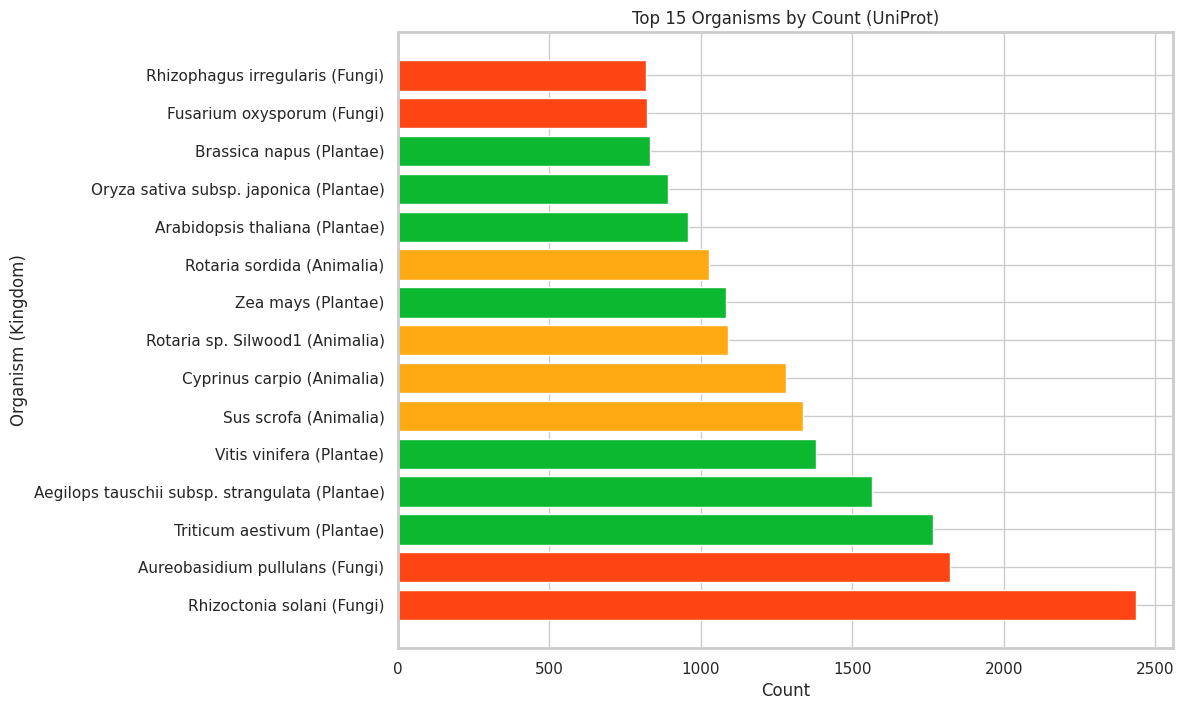

In [93]:
fig, ax = plt.subplots(figsize=(10, 8))

color_map = new_top_orgs_all.index.get_level_values(1).map({'Animalia': '#FFA913', 'Plantae': '#0BB830', 'Fungi': '#FF4513', 'Bacteria': '#AD38FA', 'Protista': '#FFDF13'})
organism_names = [f"{name[0]} ({name[1]})" for name in new_top_orgs_all.index]
ax.barh(organism_names, new_top_orgs_all.values, color=color_map)

ax.set_xlabel('Count')
ax.set_ylabel('Organism (Kingdom)')
ax.set_title('Top 15 Organisms by Count (UniProt)')
plt.savefig("./img/topOrgsUniProt.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [94]:
top_organisms_all

organism_name                         kingdom_name
Rhizoctonia solani                    Fungi           2436
Aureobasidium pullulans               Fungi           1824
Triticum aestivum                     Plantae         1766
Actinomycetia bacterium               Bacteria        1721
Aegilops tauschii subsp. strangulata  Plantae         1566
Vitis vinifera                        Plantae         1382
Sus scrofa                            Animalia        1336
Cyprinus carpio                       Animalia        1282
Acidimicrobiaceae bacterium           Bacteria        1215
Gammaproteobacteria bacterium         Bacteria        1092
Rotaria sp. Silwood1                  Animalia        1091
Zea mays                              Plantae         1083
Rotaria sordida                       Animalia        1026
Arabidopsis thaliana                  Plantae          958
Oryza sativa subsp. japonica          Plantae          891
Brassica napus                        Plantae          833
Fusar

In [95]:
bacterias['Actinomycetia bacterium'] = top_organisms_all['Actinomycetia bacterium']
bacterias['Acidimicrobiaceae bacterium'] = top_organisms_all['Acidimicrobiaceae bacterium']
bacterias['Gammaproteobacteria bacterium'] = top_organisms_all['Gammaproteobacteria bacterium']

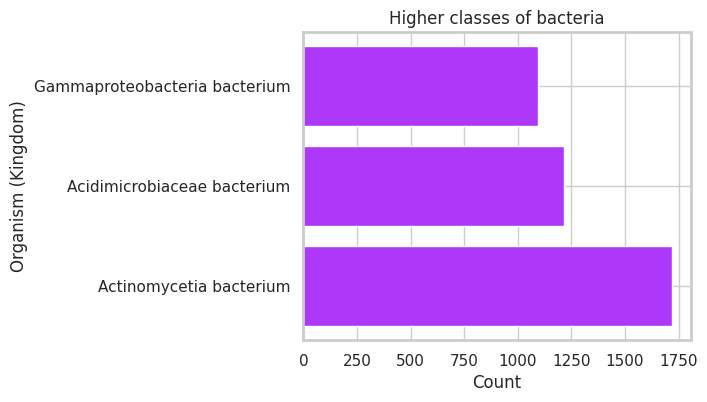

In [96]:
fig, ax = plt.subplots(figsize=(5, 4))

organism_names = bacterias.index
ax.barh(organism_names, bacterias.values, color='#AD38FA' )

ax.set_xlabel('Count')
ax.set_ylabel('Organism (Kingdom)')
ax.set_title('Higher classes of bacteria')
plt.savefig("./img/topBacterias.pdf", format="pdf", bbox_inches="tight")
plt.show()